# Exercise 7: Support Vector Machines
In this exercise, we will explore SVM kernels and study the effect of the hyperparameters on a toy dataset. 

In [1]:
# Required libraries
import matplotlib.pyplot as plt
import seaborn as sns       
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import train_test_split

### **Data**
 

In the assignment .zip file, you can find a .csv file called toy_dataset.csv.

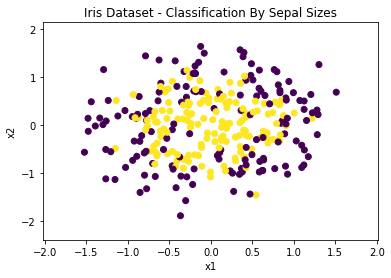

In [4]:
### ToDo
## Import the data
df=pd.read_csv('/content/drive/MyDrive/HW1/data/toy_dataset.csv')
## Visualize the data to explore it
data=df.to_numpy()
df.head()
x1= data[:,0]
x2 = data[:,1]
y = data[:,2]
x1_min, x1_max = x1.min() - 0.5, x1.max() +0.5
x2_min, x2_max = x2.min() - 0.5, x2.max() + 0.5
plt.figure()
plt.title("Iris Dataset - Classification By Sepal Sizes")
plt.scatter(x1, x2, c = y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.show()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
## Helper function to plot the decision boundary of a classifier. 
def plot_decision_svm(X, y, clf, kernel_name = 'Linear'):

  # X -- The data points
  # y -- The labels
  # clf -- The classifier
  # Kernel_name -- name of the kernel: string Linear, poly, RBF
  ax = plt.subplot(1, 1, 1)
  h = 0.05 # step size
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

  # Plot the points
  ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr,
              edgecolors='k')

  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  #ax.set_xticks(())
  #ax.set_yticks(())

  ax.set_title(kernel_name)
  plt.tight_layout()
  plt.show()

In [6]:
# Helper function to visualize the results of a grid search with the two hyperparameters of rbf kernel as a heatmap
def heatmap(grid):
    """
    grid --  GridSearchCV instance  
    """
    pvt = pd.pivot_table(pd.DataFrame(grid.cv_results_),
        values='mean_test_score', index='param_C', columns='param_gamma')
    ax = sns.heatmap(pvt, annot=True)
    ax.invert_yaxis()

### Compare SVM Kernels
 


*   Fit  SVM  with  linear,  polynomial  and  RBF  kernels  with  default parameter values


*   Plot the decision boundary for each kernel with the helper function.

*   Interpret the plots and compare the behavior of the three kernels.

In [40]:
##ToDo
#Fit different kernels 
x=data[:,0:2]

train_data,test_data,train_label,test_label=train_test_split(x,y,random_state=0,train_size=0.9,test_size=0.1)
model_linear=svm.SVC(kernel='linear') 
model_linear.fit(train_data,train_label.ravel()) 
model_poly=svm.SVC(kernel='poly') 
model_poly.fit(train_data,train_label.ravel()) 
model_rbf=svm.SVC(kernel='rbf') 
model_rbf.fit(train_data,train_label.ravel()) 

SVC()

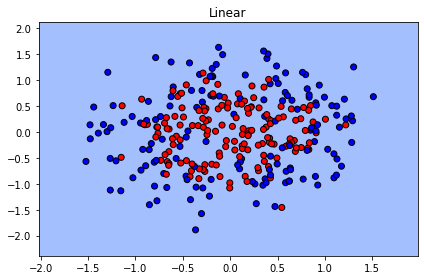

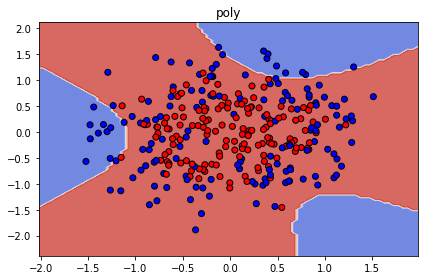

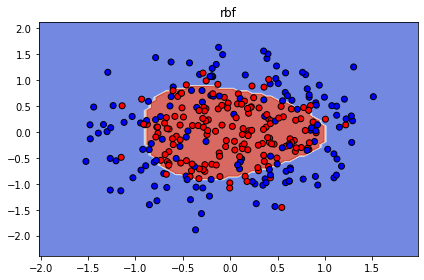

In [41]:
#Plot the decision boundary
Predict = (model_linear.predict(x).reshape(-1, 1))
plot_decision_svm(x, y, model_linear, kernel_name = 'Linear')
Predict = (model_poly.predict(x).reshape(-1, 1))
plot_decision_svm(x, y, model_poly, kernel_name = 'poly')
Predict = (model_rbf.predict(x).reshape(-1, 1))
plot_decision_svm(x, y, model_rbf, kernel_name = 'rbf')

### Optimize rbf Kernel
 

* Create a grid with the following values: {
         
                        'gamma': [1e-4, 1e-3, 1e-2, 1e-1, 1, 2],
                        
                         'C': [1e-2, 1e-1, 1, 2, 5, 10]}
* Use GridSearchCV with SVC(kernel='rbf') as classifier, and 3-fold-cross-validation(cv). 


In [51]:
##ToDo
gammas= [1e-4, 1e-3, 1e-2, 1e-1, 1, 2]
cs= [1e-2, 1e-1, 1, 2, 5, 10]
param_grid = dict(gamma = gammas,C = cs)
grid_search = GridSearchCV(model_rbf, param_grid,cv=3)
grid_search.fit(train_data, train_label) #运行网格搜索
 

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 2, 5, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 2]})

*   Plot a heatmap of the results using the provided helper function.

*   Interpret the heatmap. Analyze the effect of different values of hyperparameters. Does any combination of C and $\gamma$ leads to underfitting or overfitting?
*    Report the accuracy of the best model you get. State the hyperparameters used.

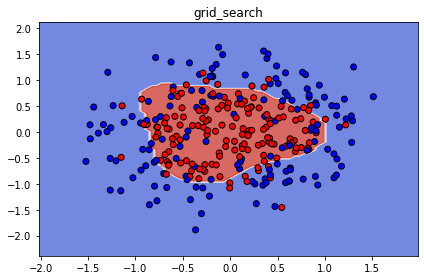

In [55]:
plot_decision_svm(x,y,grid_search.best_estimator_,'grid_search')

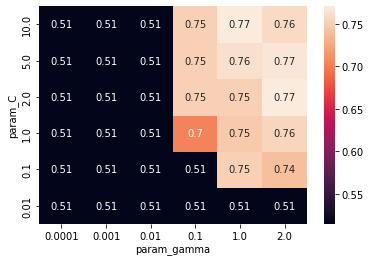

In [52]:
##ToDo
#Plot headmap of the result
heatmap(grid_search)
